In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Kanpur_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
data=pd.read_csv("Kanpur_dataset.csv")
data.head()

,datetime,precipitation,tempmax,tempmin,wind,weather
0,01-01-2020,0.0,19.5,4.0,13.0,RainCloudy
1,02-01-2020,0.0,22.6,9.0,11.2,RainCloudy
2,03-01-2020,23.0,20.1,12.1,14.8,RainCloudy
3,04-01-2020,0.0,19.3,11.0,9.4,RainCloudy
4,05-01-2020,0.0,20.0,12.0,13.0,RainCloudy


In [5]:
data.shape

(731, 6)

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

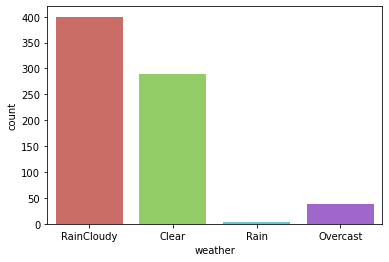

In [6]:
sns.countplot("weather",data=data,palette="hls")

In [7]:
countrain=len(data[data.weather=="RainCloudy"])
countsun=len(data[data.weather=="Clear"])
countdrizzle=len(data[data.weather=="Rain"])
countsnow=len(data[data.weather=="Overcast"])

print("Percent of RainCloudy:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Clear:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Rain:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Overcast:{:2f}%".format((countsnow/(len(data.weather))*100)))


Percent of RainCloudy:54.719562%
Percent of Clear:39.534884%
Percent of Rain:0.410397%
Percent of Overcast:5.335157%


In [8]:
data[["precipitation","tempmax","tempmin","wind"]].describe()

,precipitation,tempmax,tempmin,wind
count,731.000000,731.000000,731.000000,731.000000
mean,4.116676,30.834063,20.005062,14.069631
std,15.186149,5.890552,6.905086,8.005124
min,0.000000,14.700000,1.000000,3.400000
25%,0.000000,26.700000,14.000000,9.400000
50%,0.000000,32.600000,22.000000,13.000000
75%,0.050000,35.000000,26.000000,16.600000
max,231.000000,44.500000,30.100000,105.500000


<AxesSubplot:xlabel='wind', ylabel='Count'>

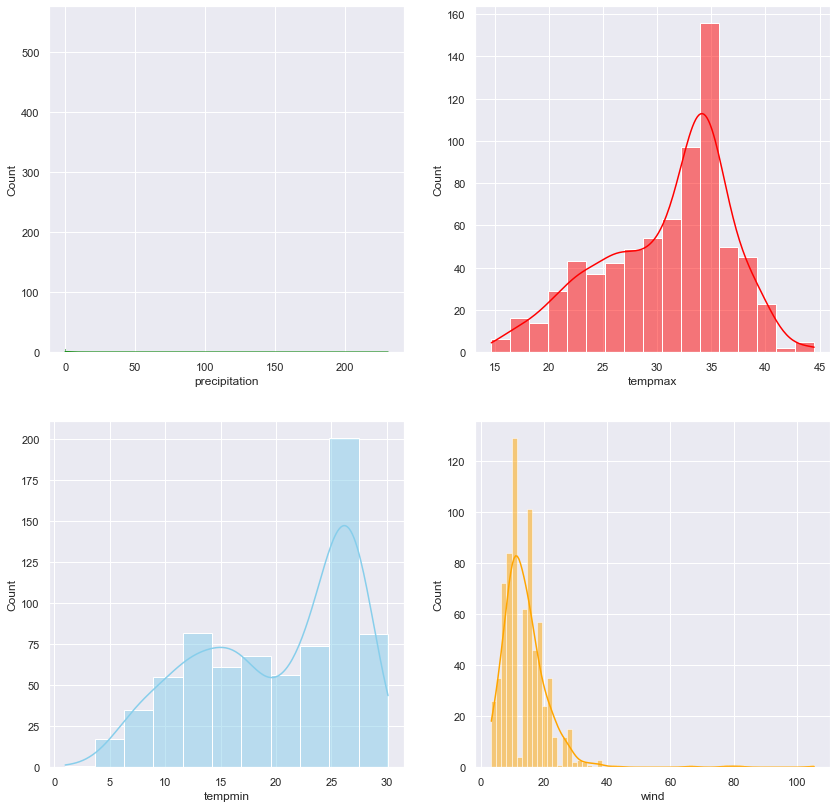

In [9]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(14,14))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:xlabel='wind'>

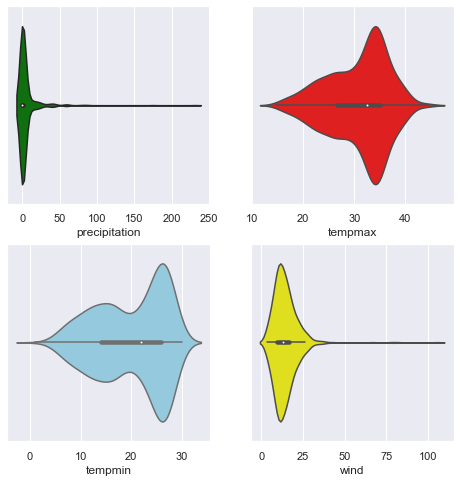

In [10]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(8,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipitation', ylabel='weather'>

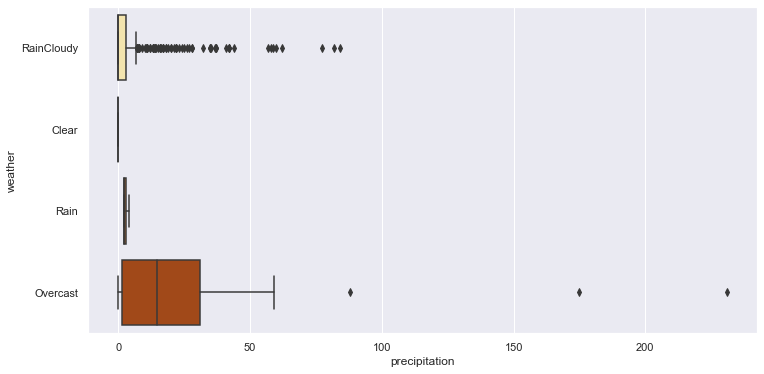

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempmax', ylabel='weather'>

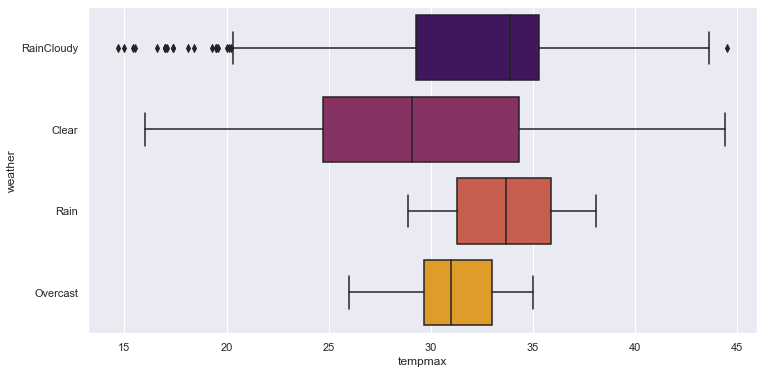

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmax","weather",data=data,palette="inferno")

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind', ylabel='weather'>

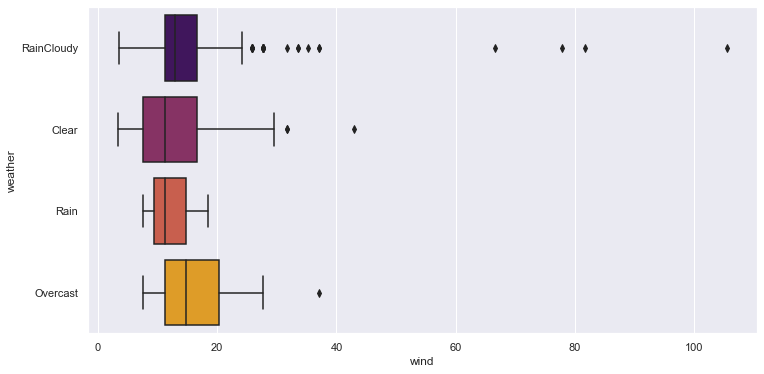

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempmin', ylabel='weather'>

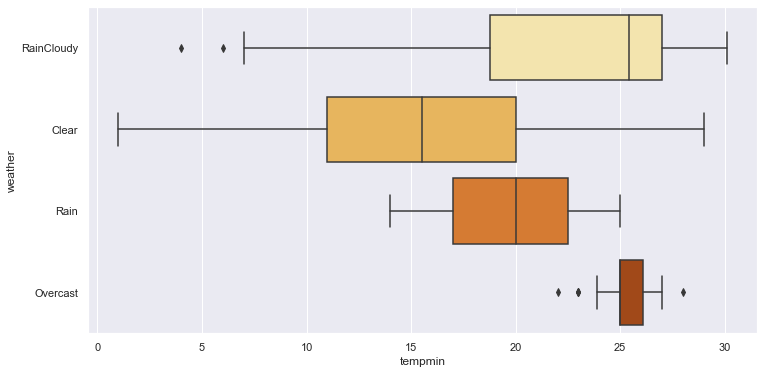

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmin","weather",data=data,palette="YlOrBr")

<AxesSubplot:>

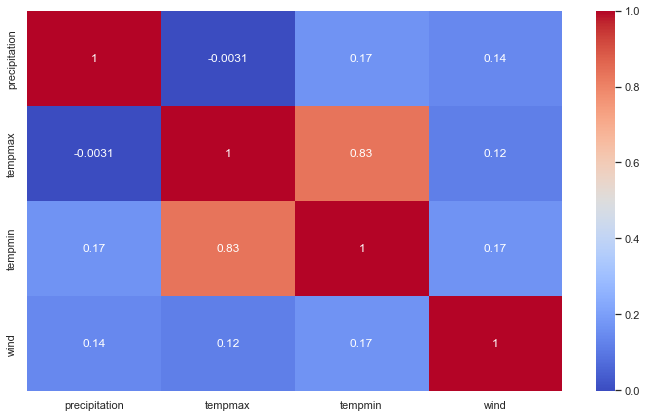

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.0030612110006370697
T Test and P value: Ttest_indResult(statistic=-44.347539190405115, pvalue=9.0717115113185e-273)


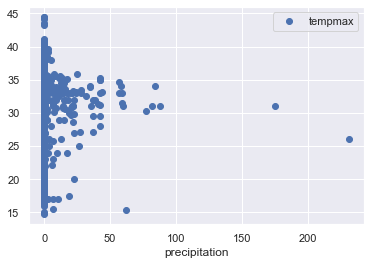

In [16]:
data.plot("precipitation","tempmax",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["tempmax"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["tempmax"]))

Pearson correlation: 0.11651636248204048
T Test and P value: Ttest_indResult(statistic=-45.60491814169703, pvalue=4.5426385588531e-283)


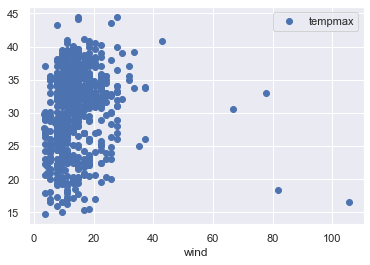

In [17]:
data.plot("wind","tempmax",style='o') 
print("Pearson correlation:",data["wind"].corr(data["tempmax"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["tempmax"]))

Pearson correlation: 0.8341499427188672
T Test and P value: Ttest_indResult(statistic=32.25814082316522, pvalue=8.251258138328203e-173)


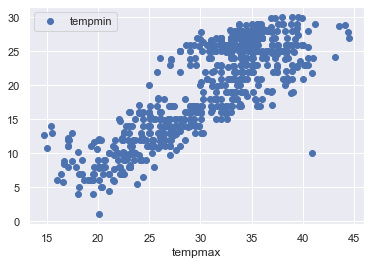

In [18]:
data.plot("tempmax","tempmin",style='o')
print("Pearson correlation:",data["tempmax"].corr(data["tempmin"]))
print("T Test and P value:",stats.ttest_ind(data["tempmax"],data["tempmin"]))

In [19]:
data.isna().sum()

datetime         0
precipitation    0
tempmax          0
tempmin          0
wind             0
weather          0
dtype: int64

In [22]:
df=data.drop(["datetime"],axis=1)

In [23]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

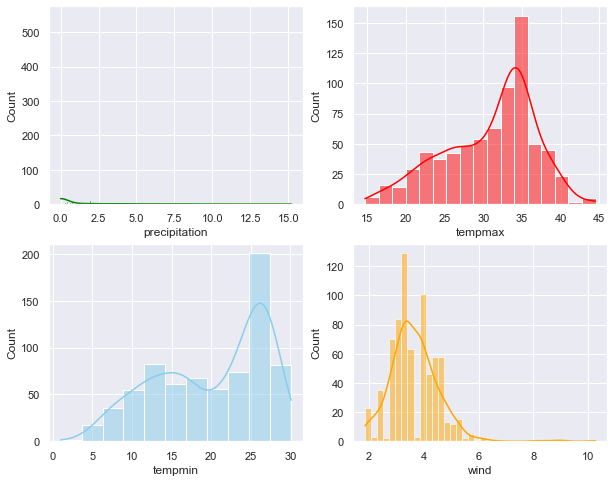

In [24]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [25]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [26]:
df.head()

,precipitation,tempmax,tempmin,wind,weather
0,0.000000,19.5,4.0,3.605551,RainCloudy
1,0.000000,22.6,9.0,3.346640,RainCloudy
2,4.795832,20.1,12.1,3.847077,RainCloudy
3,0.000000,19.3,11.0,3.065942,RainCloudy
4,0.000000,20.0,12.0,3.605551,RainCloudy


In [27]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [28]:
df.head()

,precipitation,tempmax,tempmin,wind,weather
0,0.000000,19.5,4.0,3.605551,3
1,0.000000,22.6,9.0,3.346640,3
2,4.795832,20.1,12.1,3.847077,3
3,0.000000,19.3,11.0,3.065942,3
4,0.000000,20.0,12.0,3.605551,3


In [29]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values


In [30]:
df.weather.unique()

array([3, 0, 2, 1])

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [32]:
from sklearn.model_selection import train_test_split


x_train.shape, x_test.shape


((657, 4), (74, 4))

In [33]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:83.78%


In [36]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       1.00      0.67      0.80         6
           3       0.82      0.87      0.85        38

    accuracy                           0.84        74
   macro avg       0.89      0.79      0.83        74
weighted avg       0.84      0.84      0.84        74



In [37]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:81.08%


In [38]:
print(metrics.classification_report(y_test,svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.00      0.00      0.00         6
           3       0.76      0.92      0.83        38

    accuracy                           0.81        74
   macro avg       0.55      0.58      0.57        74
weighted avg       0.75      0.81      0.78        74



C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
gbc=GradientBoostingClassifier(subsample=1,n_estimators=100,max_depth=3,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:78.38%


In [40]:
print(metrics.classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.50      0.17      0.25         6
           3       0.76      0.84      0.80        38

    accuracy                           0.78        74
   macro avg       0.70      0.61      0.63        74
weighted avg       0.77      0.78      0.77        74



In [41]:

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy:79.73%


In [42]:
print(metrics.classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       1.00      0.33      0.50         6
           3       0.77      0.87      0.81        38

    accuracy                           0.80        74
   macro avg       0.87      0.67      0.71        74
weighted avg       0.81      0.80      0.79        74



In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Random Forest:{:.2f}%".format(clf.score(x_test,y_test)*100))

Random Forest:81.08%


In [44]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       1.00      0.17      0.29         6
           3       0.77      0.89      0.83        38

    accuracy                           0.81        74
   macro avg       0.88      0.63      0.65        74
weighted avg       0.83      0.81      0.79        74



In [45]:
#Decision Tree
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Decision TRess:{:.2f}%".format(clf.score(x_test,y_test)*100))





Decision TRess:70.27%


In [46]:
!pip install graphviz


ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz


In [47]:
!pip install pydotplus

ERROR: Could not find a version that satisfies the requirement pydotplus (from versions: none)
ERROR: No matching distribution found for pydotplus


In [48]:
!pip install --upgrade scikit-learn==0.20.3

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.20.3 (from versions: none)
ERROR: No matching distribution found for scikit-learn==0.20.3


In [49]:
plt.figure(figsize=(25,8))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

NameError: name 'tree' is not defined

<Figure size 1800x576 with 0 Axes>

In [50]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         0
           3       0.69      0.82      0.75        38

    accuracy                           0.70        74
   macro avg       0.61      0.41      0.43        74
weighted avg       0.74      0.70      0.69        74



C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dinesh_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
input=[[2,28,14,18.4]]
ot=knn.predict(input)
print("The weather is:")
if(ot==3):
    print("RainCloud")
elif(ot==0):
    print("Clear")
elif(ot==2):
    print("Rain")
else:
    print("Overcast")

The weather is:
Clear


In [ ]:
 xgb.save_model("xgb_Kanpur.txt")

In [60]:
import lightgbm as lgb

In [61]:
model = lgb.LGBMClassifier(learning_rate=0.013,max_depth=-1,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

C:\Users\Dinesh_PC\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.690813	valid_0's multi_logloss: 0.734403
[40]	training's multi_logloss: 0.592332	valid_0's multi_logloss: 0.62497
[60]	training's multi_logloss: 0.526014	valid_0's multi_logloss: 0.549609
[80]	training's multi_logloss: 0.48116	valid_0's multi_logloss: 0.505216
[100]	training's multi_logloss: 0.448808	valid_0's multi_logloss: 0.479322


LGBMClassifier(learning_rate=0.013, random_state=42)

In [62]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.8158
Testing accuracy 0.8108


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

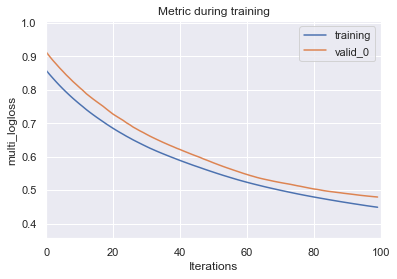

In [63]:
lgb.plot_metric(model)


ImportError: You must install graphviz and restart your session to plot tree.

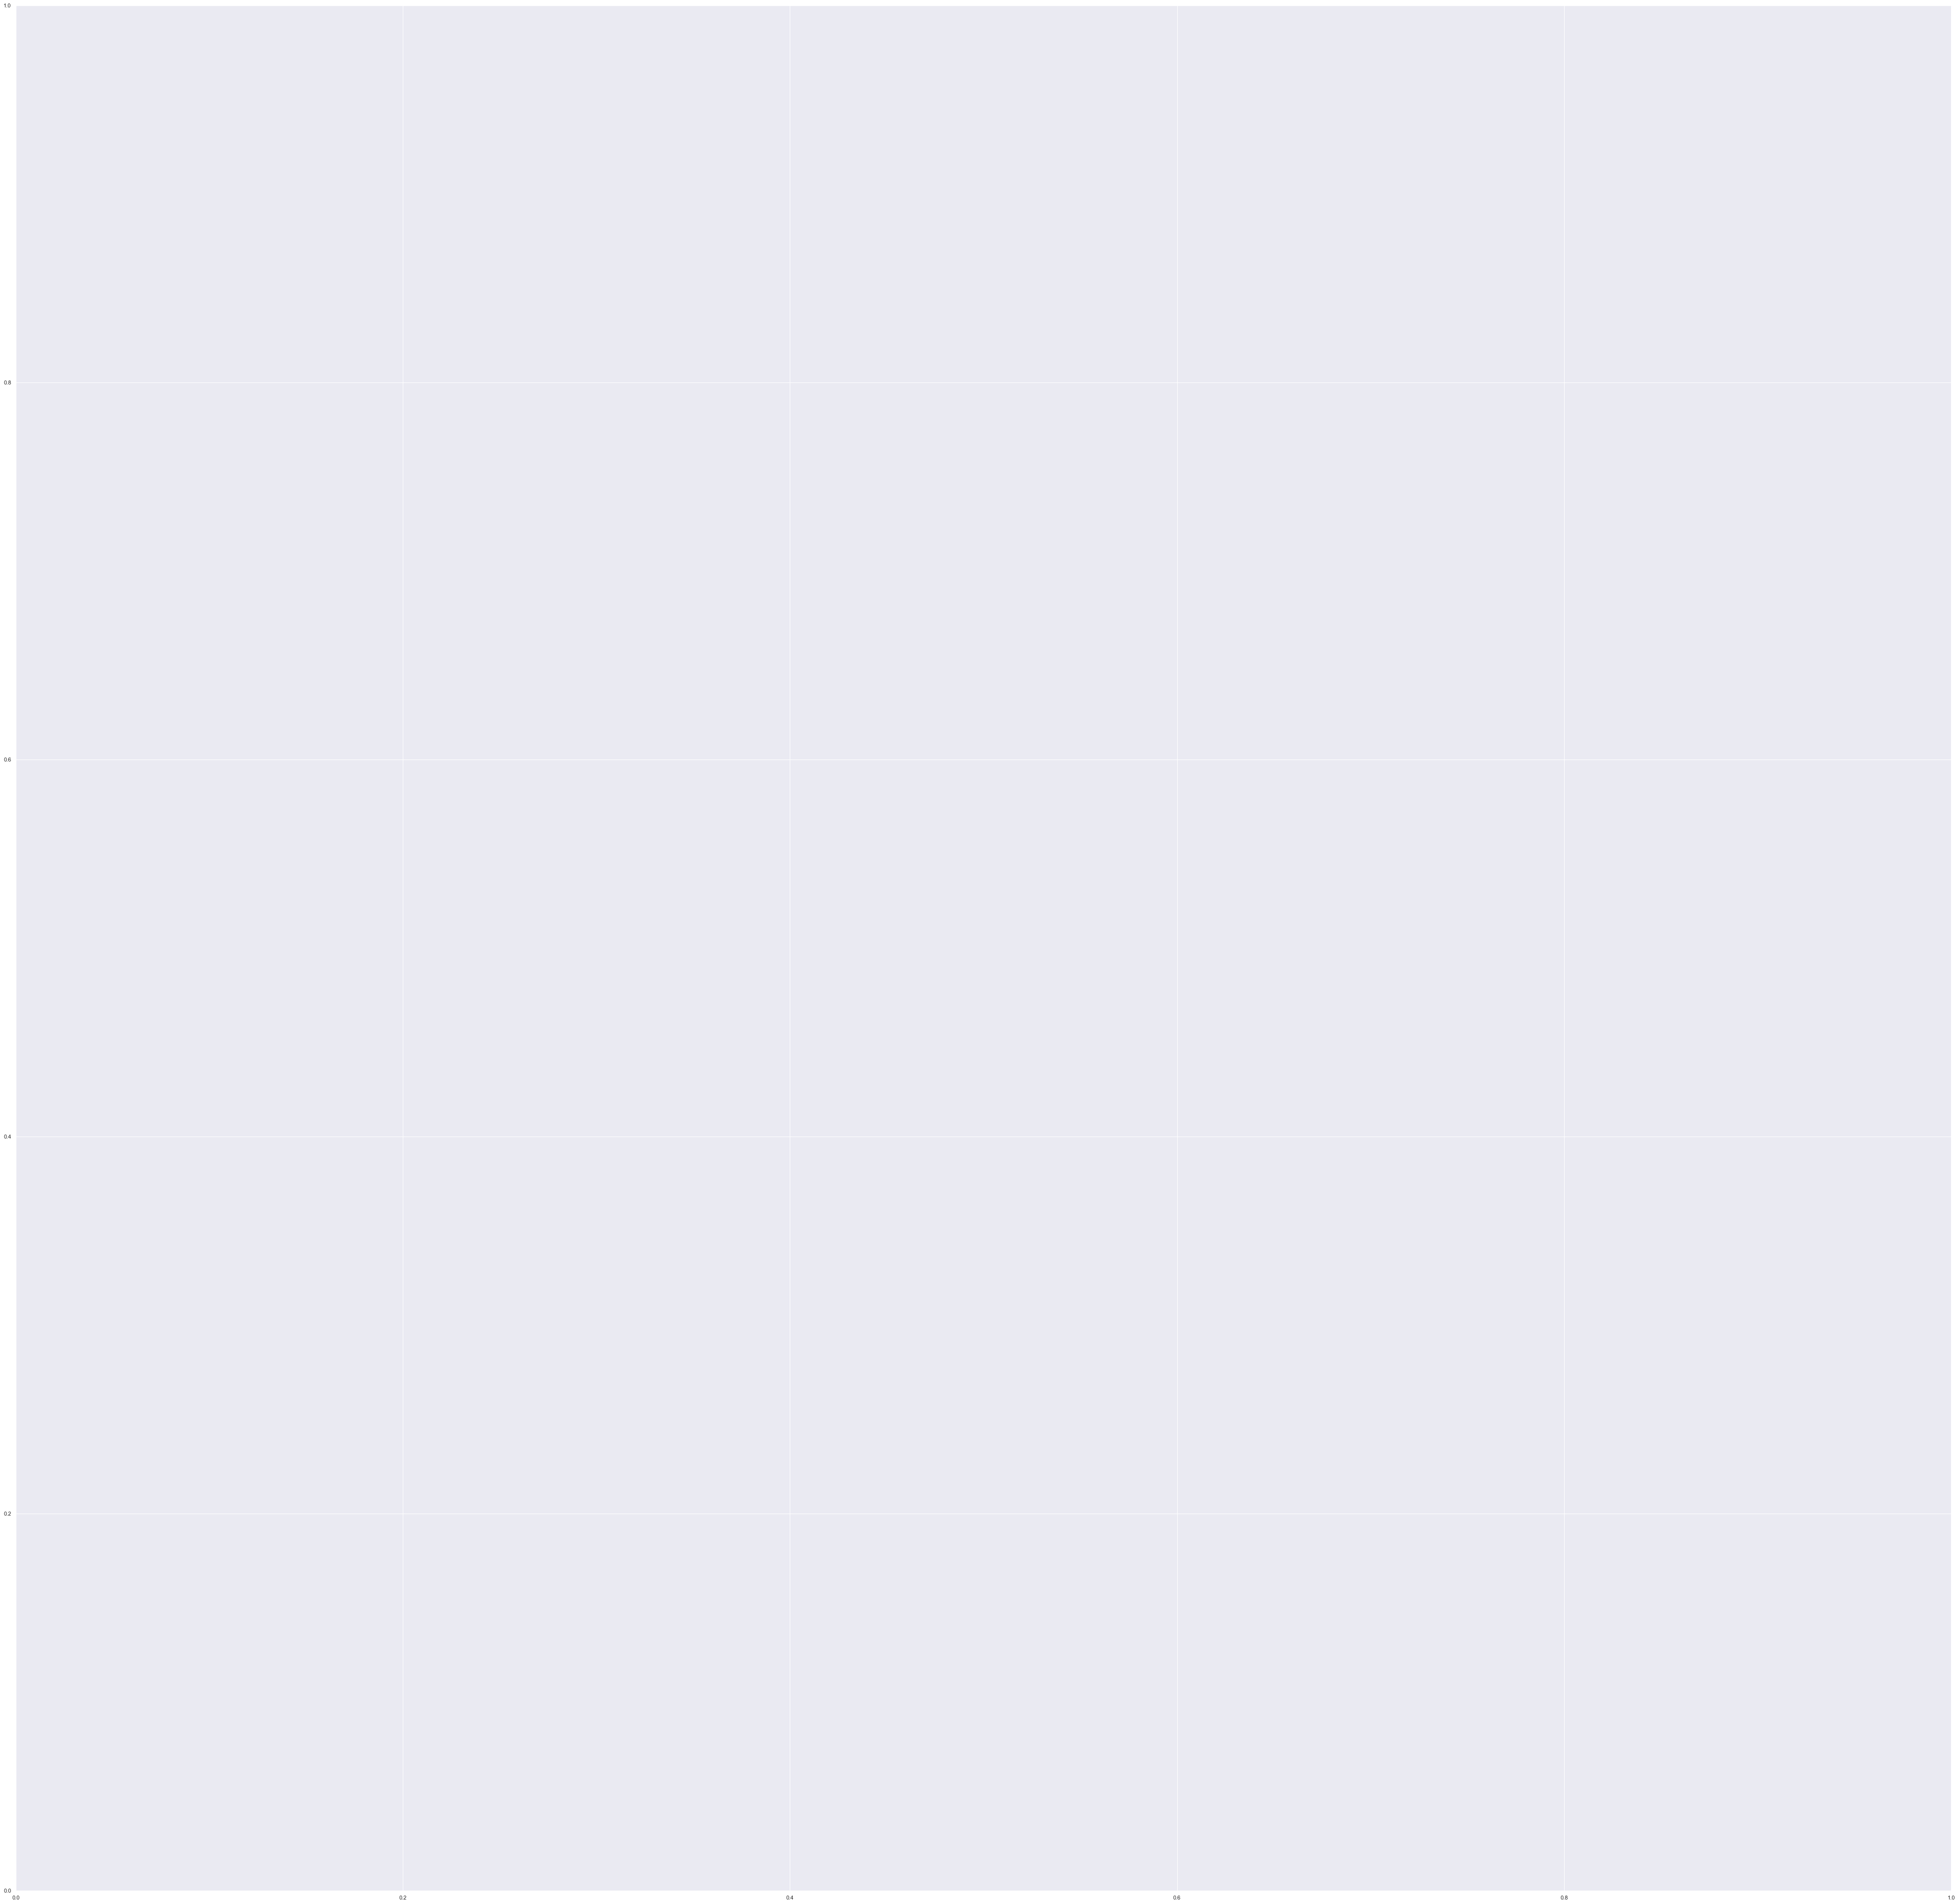

In [57]:
lgb.plot_tree(model,figsize=(70,70))

In [58]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       1.00      0.17      0.29         6
           3       0.79      0.87      0.82        38

    accuracy                           0.81        74
   macro avg       0.87      0.63      0.65        74
weighted avg       0.82      0.81      0.79        74

